In [26]:
# Data processing libraries
import pandas as pd
import numpy as np

# Data visualization and animation
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
import seaborn as sns

In [27]:
# Parameters to make more beautiful the plots
plt.rcParams.update({'mathtext.default':'regular'}) # Latex in text
sns.set(context='paper', style='whitegrid', font='Times New Roman', font_scale=1)

In [17]:
# Functions to obtain visualization and classification properties
def colors(atom):
    if atom == 1.0:
        return 'white'
    elif atom == 2.0:
        return 'black'
    else:
        return 'green'
    
def sizes(atom):
    if atom == 1.0:
        return 4
    elif atom == 2.0:
        return 16
    else:
        return 25
    
def elem(atom):
    if atom == 1.0:
        return 'C'
    elif atom == 2.0:
        return 'H'
    else:
        return 'Cl'

In [18]:
# Read the dump file obtained by LAMMPS
with open('../FC/Results/dumpnpt8.xyz','r') as fout:
    text_particle = fout.read() 

In [23]:
# Split each time set
particle_pos = text_particle.split('Atoms. Timestep:')[1:]

# Obtain the data through time in a list as a dataframe 
time_data=[]
for i in range(len(particle_pos)):
    # Clean the data
    particle_coordinates = [data_row.split(' ') for data_row in particle_pos[i].split('\n')[1:-2]]
    # Generate a dataframe
    atom_data = pd.DataFrame(particle_coordinates, columns=['type','x', 'y', 'z'], dtype=float)
    #Create more columns of the dataframe
    atom_data['c'] = atom_data.type.apply(colors) # Colors of atoms
    atom_data['s'] = atom_data.type.apply(sizes) # Size of atoms
    atom_data['e'] = atom_data.type.apply(elem) # Identification of each atom
    # Append to the empty list
    time_data.append(atom_data)
    
# Show the head of the datasets.
time_data[0].head()

89

<IPython.core.display.Javascript object>


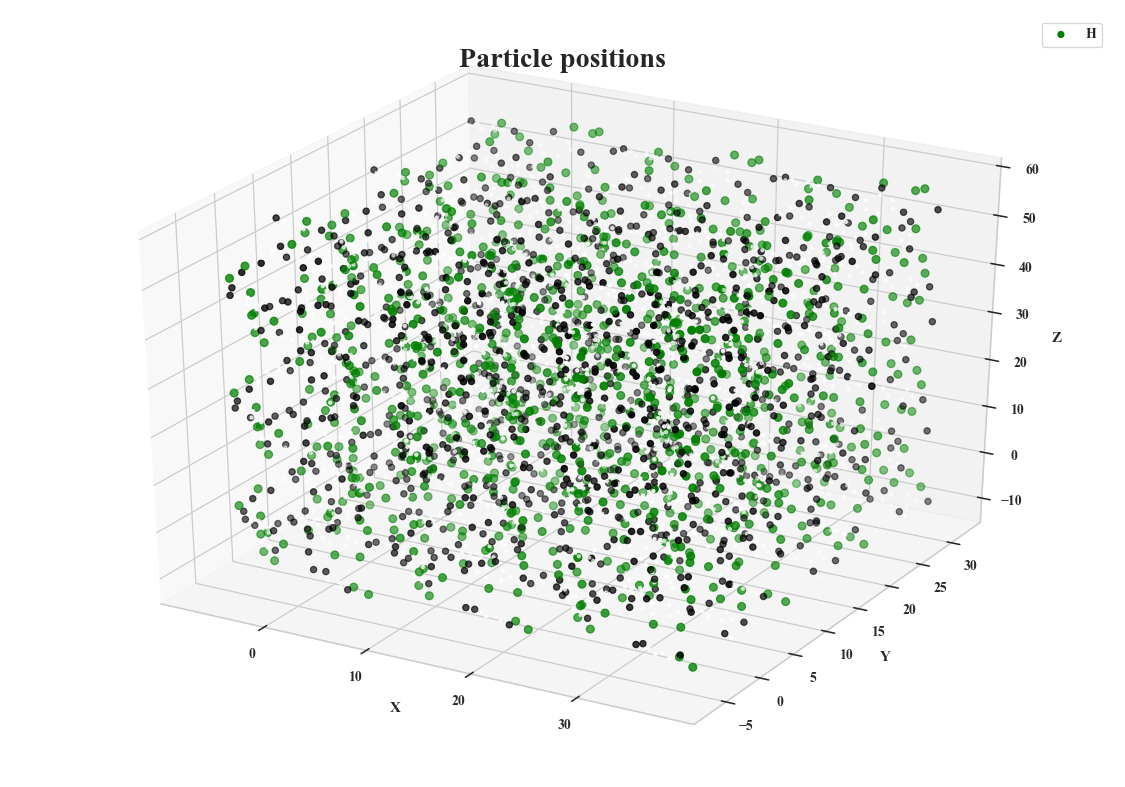

In [24]:
# Environment for plotting 
%matplotlib notebook

# Create a 3d figure 
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')


# 3D plot for visualization (initial conditions)
# Select a value 
value = 0
plot = ax.scatter(xs = np.array(time_data[value].x),
               ys = np.array(time_data[value].y),
               zs = np.array(time_data[value].z),
               c = np.array(time_data[value].c),
               s = np.array(time_data[value].s))

#Set parameters
ax.set_title(f'Particle positions', size=18)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Change the initial angle of visualization
#ax.view_init(0,90)
    
plt.tight_layout()
plt.legend(['H','C','Cl'])


# Generate an animation
# Parameter to change the speed of animation
times_mov = 1
def animate(i):
    plot._offsets3d = (time_data[times_mov*i].x,
                       time_data[times_mov*i].y,
                       time_data[times_mov*i].z)
# Call the animation function    
ani = animation.FuncAnimation(fig, animate,interval=400,
                              frames=int(len(time_data)/times_mov), repeat=True)

In [25]:
# Obtain instant coordinates to graph them on avogadro
final_coordinates = time_data[-1][['e','x','y','z']]
final_coordinates.x = final_coordinates.x - final_coordinates.x.mean()
final_coordinates.y = final_coordinates.y - final_coordinates.y.mean()
final_coordinates.z = final_coordinates.z - final_coordinates.z.mean()

final_coordinates.to_csv('../Transitory_files/final_coordinates.txt', sep = ' ', index=False)

/home/dhdzmota/.local/lib/python3.7/site-packages/pandas/core/generic.py:5209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
